### Conway’s Game of Life
Conway’s Game of Life (https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a classic example of a cellular automaton devised by mathematician John Conway. The game is a classic example of how simple rules can give rise to complex behavior. The game is played on an m-by-n board, which we will represent as an m-by-n matrix. The game proceeds in steps. At any given time, each cell of the board (i.e., entry of our matrix), is either alive (which we will represent as a 1) or dead (which we will represent as a 0). At each step, the board evolves according to a few simple rules:

• A live cell with fewer than two live neighbors becomes a dead cell.   
• A live cell with more than three live neighbors becomes a dead cell.   
• A live cell with two or three live neighbors remains alive.  
• A dead cell with exactly three live neighbors becomes alive.  
• All other dead cells remain dead.  

   The neighbors of a cell are the 8 cells adjacent to it, i.e., left, right, above, below, upper- left, lower-left, upper-right and lower-right. We will follow the convention that the board is toroidal, so that using matrix-like notation (i.e., the cell (0,0) is in the upper-left of the board and the first coordinate specifies a row), the upper neighbor of the cell (0,0) is (m − 1,0), the right neighbor of the cell (m − 1,n − 1) is (m − 1,0), etc. That is, the board “wraps around”. 
   
   Note: you are not required to use this matrix-like indexing. It’s just what I chose to use to explain the toroidal property.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import copy
from matplotlib import animation
import time
from IPython.display import display,clear_output

%matplotlib inline

1. Write a function <span style="font-family:Courier; font-size:1em;">is_valid_board</span> that takes an m-by-n numpy array (i.e., an ndarray) as its only argument and returns a Python Boolean that is True if and only if the argument is a valid representation of a Game of Life board. A valid board is any two-dimensional numpy ndarray with all entries either 0.0 and 1.0.

In [2]:
def is_valid_board(a):
    if a.ndim != 2:
        return False
    if not np.all(np.isin(a, [0.0, 1.0])):
        return False

    return True

In [3]:
a = np.array([[0,1,0,1], [1,0,0,1], [1,1,0,0]])
is_valid_board(a)


True

In [4]:
b = np.array([[0,1,1,1], [0,0,0,3], [1,1,0,0]])
is_valid_board(b)

False

2. Write a function called <span style="font-family:Courier; font-size:1em;">gol_step</span> that takes an m-by-n numpy array as its argument and returns another numpy array of the same size (i.e., also m-by-n), corresponding to the board at the next step of the game. 

    Your function should perform error checking to ensure that the provided argument is a valid Game of Life board.

In [5]:
from scipy.signal import convolve2d

def gol_step(a):
    if not is_valid_board(a):
        raise ValueError("Invalid Game of Life board.")
    kernel = np.array([[1,1,1],
                        [1,0,1],
                        [1,1,1]])
    neighbors_count = convolve2d(a, kernel, mode='same', boundary='fill', fillvalue=0) # 用0填充邊界外的區域，這樣在計算邊界上的細胞時，邊界之外的鄰居都會被視為死細胞。
    # 創建一個新的陣列來存儲下一步的狀態
    next_board = np.zeros_like(a)
    
    # 規則1：如果一個細胞是活的並且鄰居數是2或3，保持活著。其他死掉
    next_board[(a == 1) & ((neighbors_count == 2) | (neighbors_count == 3))] = 1
    next_board[(a == 1) & ((neighbors_count >3) | (neighbors_count < 2))] = 0
    
    # 規則2：如果一個細胞是死的並且鄰居數正好是3，變成活的
    next_board[(a == 0) & (neighbors_count == 3)] = 1

    return next_board



In [6]:
x = np.array([[0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0]])
y = gol_step(x)
y

array([[0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

3. Write a function called draw_gol_board that takes an m-by-n numpy array (i.e., an ndarray) as its only argument and draws the board as an m-by-n set of tiles, colored black or white correspond to whether the corresponding cell is alive or dead, respectively. Your plot should not have any grid lines, nor should it have any axis labels or axis ticks. 

    Hint: see the functions plt.xticks() and plt.yticks() for changing axis ticks. 
    
    Hint: you may find the function plt.get_cmap to be useful for working with the matplotlib Colormap objects.

In [7]:
def draw_gol_board(a):
    if not is_valid_board(a):
        raise ValueError("Invalid Game of Life board.")
    # 創建繪圖區域
    fig, ax = plt.subplots(figsize=(3, 3))
    
    # 使用 imshow 繪製棋盤，cmap 設定為 'gray'（黑白）
    ax.imshow(a, cmap=plt.get_cmap('gray_r'))

    # 去掉坐標軸、刻度、邊匡
    plt.xticks([])  # 移除刻度
    plt.yticks([]) 
    ax.set_xticks([])  # 移除標籤
    ax.set_yticks([])  
    ax.axis('off')


    # 顯示圖像
    plt.show()
    


In [8]:
x

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0]])

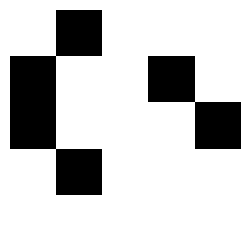

In [9]:
board = draw_gol_board(x)

4.  Create a 20-by-20 numpy array corresponding to a Game of Life board in which all cells are dead, with the exception that the top-left 5-by-5 section of the board looks like this:
    
    Plot this 20-by-20 board using draw_gol_board.

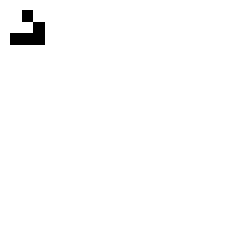

In [10]:
# 創建一個 20x20 的全死細胞棋盤
board = np.zeros((20, 20))

# 創建 5x5 的滑翔機圖案
glider = np.array([[0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 0],
                   [1, 1, 1, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0]])

# 將滑翔機圖案放入 20x20 棋盤的左上角
board[0:5, 0:5] = glider

draw_gol_board(board)

5. Generate a plot with 5 subplots, arranged in a 5-by-1 grid, showing the first five steps of the Game of Life when started with the board you just created, with the steps ordered from top to bottom, The figure in the 5-by-5 sub-board above is called a glider, and it is interesting in that, as you can see from your plot, it seems to move along the board as you run the game.

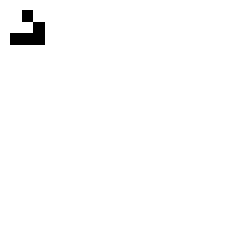

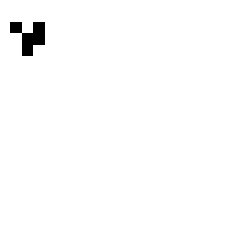

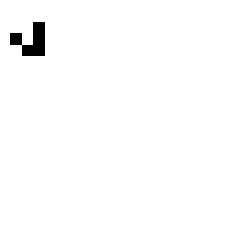

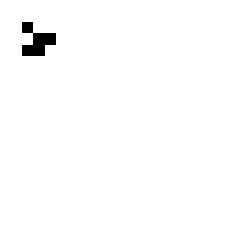

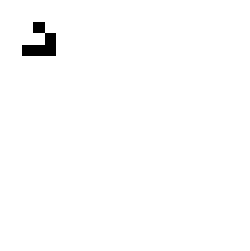

In [11]:
# 創建一個 20x20 的全死細胞棋盤
board = np.zeros((20, 20))

# 創建 5x5 的滑翔機圖案
glider = np.array([[0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 0],
                   [1, 1, 1, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0]])

# 將滑翔機圖案放入 20x20 棋盤的左上角
board[0:5, 0:5] = glider


for i in range(5):
    draw_gol_board(board)
    board = gol_step(board)

6. Create a function called draw_animation that takes two arguments, a Game of Life board and a number of steps, and generates an animation of the game as it runs for the given number of steps.

In [14]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # 用來顯示動畫

def draw_animation(initial_board, steps):
    
    #把棋盤放入20*20全死細胞的左上
    board = np.zeros((20, 20))
    i, j = initial_board.shape  # Get the number of rows and columns
    board[:i, :j] = initial_board

    def draw_board(board):
        fig, ax = plt.subplots(figsize=(3, 3))
        im = ax.imshow(board, cmap=plt.get_cmap('gray_r'))
        plt.xticks([]) 
        plt.yticks([]) 
        ax.set_xticks([]) 
        ax.set_yticks([])  
        ax.axis('off')
        
        return fig, ax, im


    fig, ax, im = draw_board(board)
   
    def init():
        im.set_array(board)  # 初始化圖像為初始棋盤
        return [im]


    # 更新函數，每一步更新棋盤
    def update(frame):
        nonlocal board
        board = gol_step(board)  # 使用 gol_step 函數更新棋盤
        im.set_array(board)  # 更新圖像的數據
        return [im]
    
    # 創建動畫
    anim = FuncAnimation(
        fig,       
        update,    # 幀更新
        frames=steps,  # 動畫步數
        init_func=init, #顯示第一幀
        interval=1000,  # 每幀的時間間隔（毫秒）
        blit=True  # 使用 blit 優化更新
    )

    # 返回動畫作為 HTML 在 Jupyter Notebook 中顯示
    return HTML(anim.to_jshtml())



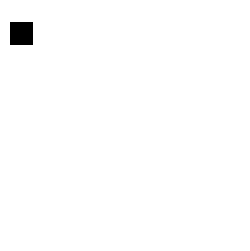

In [13]:
draw_animation(a,100)